In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from tqdm import tqdm

In [2]:
def merge_lists(lists):
    # Check if lists is empty
    if not lists:
        return lists
    # Initialize the result list with the first list's set to start the merging process
    merged = [set(lists[0])]
    for current in lists[1:]:
        current_set = set(current)
        found = False
        # Attempt to merge current set with an existing merged set
        for i in range(len(merged)):
            if not current_set.isdisjoint(merged[i]):
                merged[i] = merged[i].union(current_set)
                found = True
                break
        if not found:
            merged.append(current_set)
    # Reduce any possible overlaps after the initial merge
    for i in range(len(merged)):
        for j in range(i+1, len(merged)):
            if not merged[i].isdisjoint(merged[j]):
                merged[i] = merged[i].union(merged[j])
                merged[j] = set()
    # Filter out any empty sets and convert back to lists
    merged = [list(group) for group in merged if group]
    return merged

In [3]:
'''path = '16mutauC11';i=7;frame=15
data_dssp = [(line.strip('\n').split()[1]).split('!') for line in open('data_all/{}-{}.dssp'.format(path,i+1)).readlines()[-frame:]]
data_beta = [line.strip('\n').split()[2:] for line in open('data_all/{}-{}.dssp'.format(path,i+1)).readlines()[-frame:]]
data_cl = [line.strip('\n').split()[1:] for line in open('data_all/{}-{}.bc'.format(path,i+1)).readlines()[-frame:]]
layer_no = []
for i in tqdm(range(len(data_cl)),desc='Processing each frame to count beta layers'):
    #split clusters and convert chain id to be int
    groups = [x for x in [[int(chain_str) for chain_str in chains_lst.split(',') if len(chains_lst.split(',')) > 1] for chains_lst in data_cl[i]] if x]
    if len(groups) == 0:
        new_groups = []
    else:
        #remove non-betasheet chain from group or each cluster and filter clusters that less than 2
        new_groups = list(filter(lambda pep: len(pep) > 1, [[chain for chain in group if 'E' in data_dssp[i][chain]] for group in groups])) 
    sheet_ids = []
    for beta_cluster in data_beta[i]:
        #extract chain id from clustered beta oligomer
        beta_chain_ini = [int(x.split('.')[0])-1 for x in beta_cluster.split(',')]
        #remove the cases of beta hairpin and self-multi beta sheets and output sheet number
        sheet_ids.append(sorted(set(beta_chain_ini),key=beta_chain_ini.index))
    merged_sheet_ids = sum(sheet_ids, [])
    if len(merged_sheet_ids) != len(sorted(set(merged_sheet_ids))):
        sheet_ids = merge_lists(sheet_ids)
    if len(new_groups) == 0 or len(sheet_ids) == 0:
        layer_no.append(0)
    else:
        for group in new_groups:
            layer_no.append(sum([set(sheet).issubset(group) for sheet in sheet_ids]))
print(layer_no)'''

"path = '16mutauC11';i=7;frame=15\ndata_dssp = [(line.strip('\n').split()[1]).split('!') for line in open('data_all/{}-{}.dssp'.format(path,i+1)).readlines()[-frame:]]\ndata_beta = [line.strip('\n').split()[2:] for line in open('data_all/{}-{}.dssp'.format(path,i+1)).readlines()[-frame:]]\ndata_cl = [line.strip('\n').split()[1:] for line in open('data_all/{}-{}.bc'.format(path,i+1)).readlines()[-frame:]]\nlayer_no = []\nfor i in tqdm(range(len(data_cl)),desc='Processing each frame to count beta layers'):\n    #split clusters and convert chain id to be int\n    groups = [x for x in [[int(chain_str) for chain_str in chains_lst.split(',') if len(chains_lst.split(',')) > 1] for chains_lst in data_cl[i]] if x]\n    if len(groups) == 0:\n        new_groups = []\n    else:\n        #remove non-betasheet chain from group or each cluster and filter clusters that less than 2\n        new_groups = list(filter(lambda pep: len(pep) > 1, [[chain for chain in group if 'E' in data_dssp[i][chain]] for 

In [4]:
def beta_layer(data_beta,data_cl,data_dssp):
    layer_no = []
    for i in tqdm(range(len(data_cl)),desc='Processing each frame to count beta layers'):
        #split clusters and convert chain id to be int
        groups = [x for x in [[int(chain_str) for chain_str in chains_lst.split(',') if len(chains_lst.split(',')) > 1] for chains_lst in data_cl[i]] if x]
        if len(groups) == 0:
            new_groups = []
        else:
            #remove non-betasheet chain from group or each cluster and filter clusters that less than 2
            new_groups = list(filter(lambda pep: len(pep) > 1, [[chain for chain in group if 'E' in data_dssp[i][chain]] for group in groups]))  
        sheet_ids = []
        for beta_cluster in data_beta[i]:
            #extract chain id from clustered beta oligomer
            beta_chain_ini = [int(x.split('.')[0])-1 for x in beta_cluster.split(',')]
            #remove the cases of beta hairpin and self-multi beta sheets and output sheet number
            sheet_ids.append(sorted(set(beta_chain_ini),key=beta_chain_ini.index))
        merged_sheet_ids = sum(sheet_ids, [])
        if len(merged_sheet_ids) != len(sorted(set(merged_sheet_ids))):
            sheet_ids = merge_lists(sheet_ids)
        if len(new_groups) == 0 or len(sheet_ids) == 0:
            layer_no.append(0)
        else:
            for group in new_groups:
                layer_no.append(sum([set(sheet).issubset(group) for sheet in sheet_ids]))
    return layer_no

In [5]:
pathes = ['16tauC10','16tauC11','16mutauC11']
frame = 120000
for path in pathes:
    data_cl = []
    data_beta = []
    data_dssp = []
    print(f"Processing {path}: ")
    for i in tqdm(range(50),desc='Read dssp and beta cluster files'):
        data_beta.extend([line.strip('\n').split()[2:] for line in open('data_all/{}-{}.dssp'.format(path,i+1)).readlines()[-frame:]])
        data_cl.extend([line.strip('\n').split()[1:] for line in open('data_all/{}-{}.cluster'.format(path,i+1)).readlines()[-frame:]])
        data_dssp.extend([(line.strip('\n').split()[1]).split('!') for line in open('data_all/{}-{}.dssp'.format(path,i+1)).readlines()[-frame:]])
    mw_layer = beta_layer(data_beta, data_cl, data_dssp)
    np.save(f'beta_layer_{path}.npy',mw_layer)

Processing 16tauC10: 


Processing each frame to count beta layers: 100%|██████████| 6000000/6000000 [01:40<00:00, 59827.42it/s]


Processing 16tauC11: 


Processing each frame to count beta layers: 100%|██████████| 6000000/6000000 [01:46<00:00, 56136.92it/s]


Processing 16mutauC11: 


Processing each frame to count beta layers: 100%|██████████| 6000000/6000000 [01:14<00:00, 80898.36it/s]


In [6]:
del data_cl
del data_beta
del data_dssp

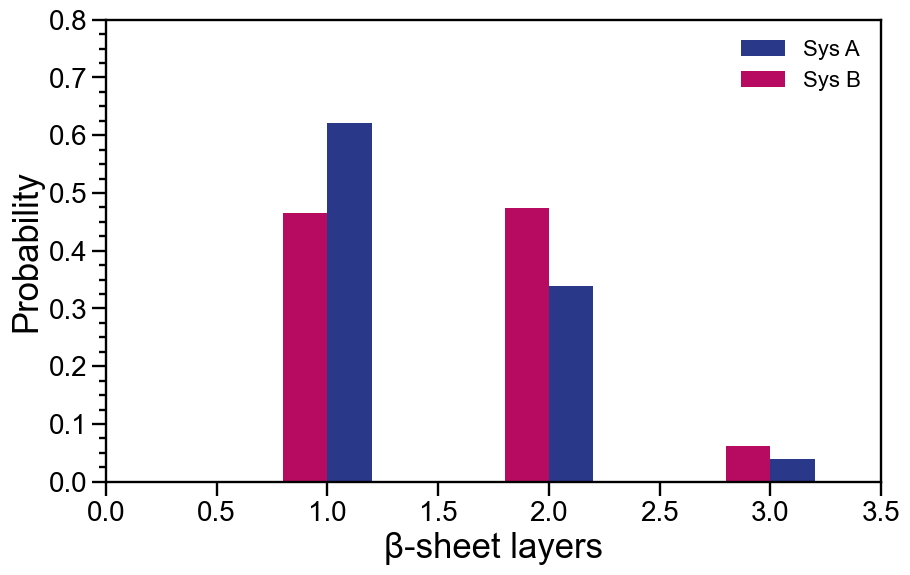

In [10]:
font_tick = 20
font_label = 25
axes_width = 1.7
tick_length = 10
fontstyle = 'Arial'
plt.figure(figsize=(10,6))
pathes = ['16tauC10','16tauC11']#,'16mutauC11']
names = ['Sys A','Sys B']#,'tauC11-mut']
colors = ('#2A3889','#B70B61')
#Increase thickness of axes
plt.gca().spines['top'].set_linewidth(axes_width)
plt.gca().spines['right'].set_linewidth(axes_width)
plt.gca().spines['bottom'].set_linewidth(axes_width)
plt.gca().spines['left'].set_linewidth(axes_width)
#add  minor ticks
#plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(4))
#control ticks
plt.tick_params(axis='both',labelsize=font_tick,width=axes_width,length=tick_length)
plt.gca().xaxis.set_tick_params(which='minor', width=axes_width, length=tick_length/2)
plt.gca().yaxis.set_tick_params(which='minor', width=axes_width, length=tick_length/2)
width = 0.2
for i,path in enumerate(pathes):
    mw_layer = np.load(f'beta_layer_{path}.npy')
    vmax = 4#mw_layer.max()
    result = np.histogram(mw_layer,bins=vmax,range=[0,vmax],density=False)
    x_axis = result[1][:-1]
    plt.bar(x_axis-width*((i-0.5)),result[0]/np.sum(result[0]),label=names[i],width=width,color=colors[i])
ax = plt.gca()
for label_x,label_y in zip(ax.get_xticklabels(),ax.get_yticklabels()):
    label_x.set_fontname(fontstyle)
    label_y.set_fontname(fontstyle)
plt.xlabel(u'\u03B2-sheet layers',fontsize=font_label,family=fontstyle)
plt.ylabel('Probability',fontsize=font_label,family=fontstyle)
plt.xlim(0,3.5)
plt.ylim(0,0.8)
plt.legend(prop={'size':font_tick-4,'family':fontstyle},frameon=False)
plt.savefig('beta_layer.eps',format='eps',transparent=True)